In [47]:
# Imort libraries
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
from collections import defaultdict, Counter
from datetime import datetime


In [84]:
# load as Pandas dataframe, convert login time as datetime object
df_json = pd.read_json('/Users/dona/Documents/DonaRay/SpringBoard/git/SpringBoard/ultimate_challenge/logins.json',
                       convert_dates=True)

In [81]:
print(df_json.info())
print(df_json.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB
None
           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21


In [85]:
# Set login time as index, add column count which takes value 1 for each row

print(df_json.columns)

df_json.set_index('login_time', inplace=True)
df_json['count'] = 1

print(type(df_json))

Index(['login_time'], dtype='object')
<class 'pandas.core.frame.DataFrame'>


In [86]:
df_temp = df_json.resample('15Min', how='sum')

# Rows have nan values
print('Rows have Nan or missing values')
print('===========')
print(df_temp.info())

print('')
print('Remove Nan values')
print('===========')
df_temp = df_temp.fillna(0)
print(df_temp.info())


Rows have Nan or missing values
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
count    9381 non-null float64
dtypes: float64(1)
memory usage: 152.9 KB
None

Remove Nan values
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
count    9788 non-null float64
dtypes: float64(1)
memory usage: 152.9 KB
None


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


When we aggregate the data in time intervals of 15 minutes, there are Nan values, because there are no logins or zero counts in some intervals. We replace the Nan values with zero. 

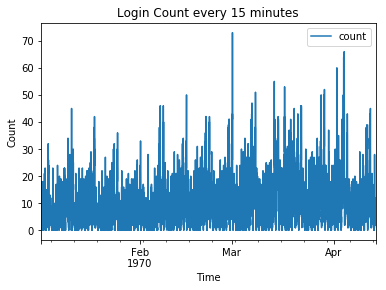

In [88]:
# Plot the data
df_temp.plot()
plt.title('Login Count every 15 minutes')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()


The above plot shows the login counts every 15 minutes. There is a spike in March and April, and overall there is an 
increasing trend.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


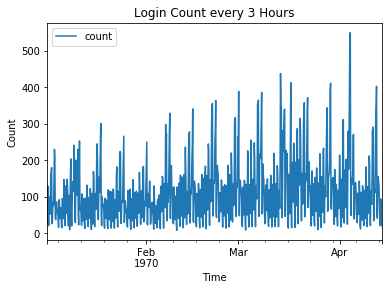

In [89]:
# Plot the data by day
df_3H = df_json.resample('3H', how='sum')

#print(df_3H.info())
df_3H.plot()
plt.title('Login Count every 3 Hours')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()


The above plot shows the login count every 3 hours. The increasing trend can be clearly seen. 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


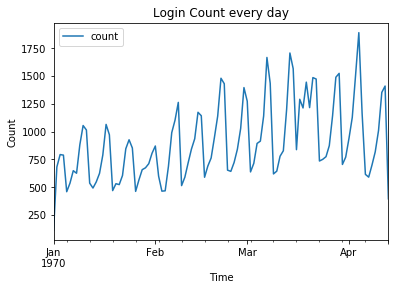

In [90]:
# Plot the data by day
df_day = df_json.resample('D', how='sum')

#print(df_day.info())
df_day.plot()
plt.title('Login Count every day')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


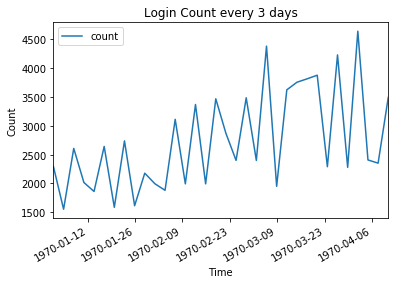

In [91]:
# PLot the data every 3 days
df_3D = df_json.resample('3D', how='sum')

#print(df_3D.info())
df_3D.plot()
plt.title('Login Count every 3 days')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

The last two plots show the daily login count and the count every three days respectively. Both the plots show the 
increasing trend as well as the two spikes in March and April. 